In [41]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import warnings
from pathlib import Path
import s3fs
from pprint import pprint
import matplotlib

warnings.filterwarnings('ignore')

In [42]:
# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# and a new matplotlib routine 
import matplotlib.path as mpath

In [43]:
## Import the ecco_v4_py library into Python
## =========================================
##    If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  The example below adds
##    ecco_v4_py to the user's path if it is stored in the folder
##    ECCOv4-py under the user's home directory

from os.path import join,expanduser
user_home_dir = expanduser('~')

sys.path.append(join(user_home_dir,'ECCOv4-py'))

import ecco_v4_py as ecco

In [44]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

## currently set to ~/Downloads/ECCO_V4r4_PODAAC, 
## the default if ecco_podaac_download was used to download dataset granules
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')

In [51]:
s3 = []
s3 = s3fs.S3FileSystem(anon=False)

# fields = ['UVEL','THETA','SALT','GEOMETRY']
fields = ['THETA','SALT']
field_urls = {}
for field in fields:
    # find filenames
    file_list = s3.glob(f'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/{field}_AVG_DAILY/*nc')
    print('\nas s3 paths')
    pprint(file_list)
    
    # construct url form of filenames
    urls = [
            's3://' + f
            for f in file_list
        ]
    
    print('\nas urls')
    pprint(urls)
    field_urls[field] = urls


as s3 paths
['ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-16_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-17_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-18_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-19_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-20_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-21_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-22_ECCO_SASSIE_V1_HH_llc1080.nc',
 'ecco-processed-data/SASSIE/N1/V1/HH/NETCD

In [52]:
field_urls

{'THETA': ['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-16_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-17_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-18_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-19_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-20_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-21_ECCO_SASSIE_V1_HH_llc1080.nc',
  's3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/THETA_AVG_DAILY/THETA_day_mean_2014-01-22_ECCO_SASSIE_V1_HH_llc1080.nc',

In [53]:
data = dict()
for field in field_urls:
    print(field)
    remote_files = field_urls[field]
    
    fileset = [s3.open(file) for file in remote_files]

    # This works
    data[field] = xr.open_mfdataset(fileset, combine='by_coords')

THETA
SALT


In [16]:
grid = data['GEOMETRY'].load()

In [60]:
sst=data['THETA'].THETA.isel(k=0, time=10).load()
t20=data['THETA'].THETA.isel(k=20, time=10).load()

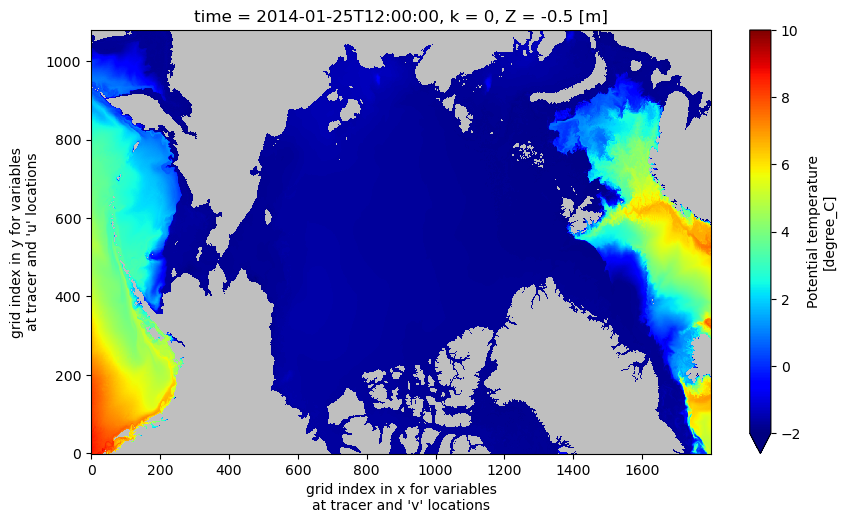

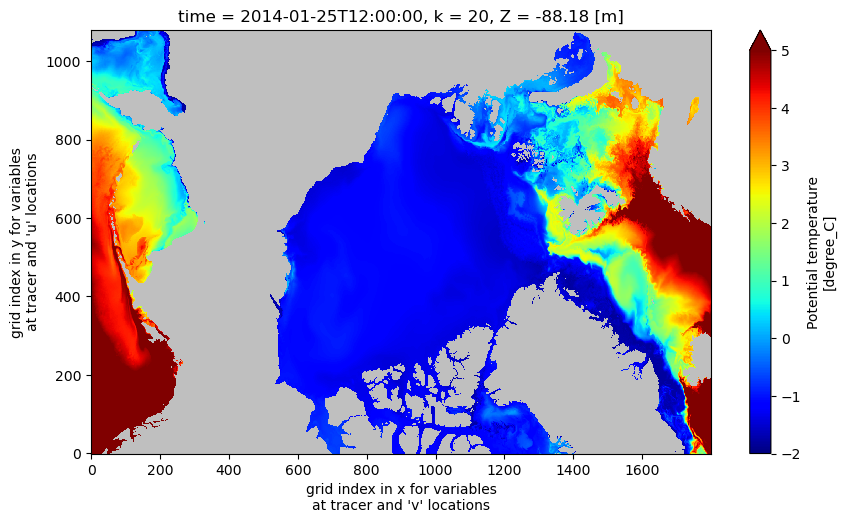

In [61]:
cmap = matplotlib.cm.jet
cmap.set_bad('gray',0.5)

plt.figure(figsize=[10,5.5]);
tmpsst = sst.where(grid.maskC.isel(k=0) == True)
tmpsst.plot(cmap=cmap, vmin=-2,vmax=10)
# plt.title(f'THETA k=0, {grid.Z.values[0]:.2f}m')

plt.figure(figsize=[10,5.5]);
tmpt20 = t20.where(grid.maskC.isel(k=20) == True)
tmpt20.plot(cmap=cmap, vmin=-2,vmax=5)
# plt.title(f'THETA k=20, {grid.Z.values[20]:.2f}m')

In [17]:
sss=data['SALT'].SALT.isel(k=0).load()
sst=data['THETA'].THETA.isel(k=0).load()
u0=data['UVEL'].UVEL.isel(k=0).load()

In [19]:
s20=data['SALT'].SALT.isel(k=20).load()
t20=data['THETA'].THETA.isel(k=20).load()
u20=data['UVEL'].UVEL.isel(k=20).load()

In [210]:
grid

<xarray.Dataset> Size: 5GB
Dimensions:  (j: 1080, i: 1800, j_g: 1080, i_g: 1800, k_p1: 91, k: 90, k_u: 90,
              k_l: 90, nb: 4, nv: 2)
Coordinates: (12/19)
  * i        (i) int32 7kB 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * i_g      (i_g) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * j        (j) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * j_g      (j_g) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * k        (k) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    ...       ...
    Zp1      (k_p1) float32 364B 0.0 -1.0 -2.14 ... -6.082e+03 -6.52e+03 -7e+03
    Zu       (k_u) float32 360B -1.0 -2.14 -3.44 ... -6.082e+03 -6.52e+03 -7e+03
    Zl       (k_l) float32 360B 0.0 -1.0 -2.14 ... -6.082e+03 -6.52e+03
    XC_bnds  (j, i, nb) float32 31MB -128.1 -128.1 -128.0 ... 52.0 52.0 51.92
    YC_bnds  (j, i, nb) float32 31MB 48.7 48.65 48.65 48.7 ... 63.33 63.36 63.36
    Z_bnds   (k, nv) float32 720B 0.0 -1.0 -1.0 ... -6.52e+03 -6.52e+03 -7e+03
Dimensions without coordinates: nb, nv
Data variables: (12/20)
    CS       (j, i) float64 16MB 0.0 0.0 -6.473e-14 -6.473e-14 ... 0.0 0.0 0.0
    SN       (j, i) float64 16MB 1.0 1.0 1.0 1.0 1.0 ... -0.0 -0.0 -0.0 -0.0
    rAc      (j, i) float64 16MB 3.515e+07 3.509e+07 ... 1.336e+07 1.342e+07
    dxG      (j_g, i) float64 16MB 5.747e+03 5.741e+03 ... 3.498e+03 3.505e+03
    dyG      (j, i_g) float64 16MB 6.114e+03 6.108e+03 ... 3.825e+03 3.833e+03
    rAz      (j_g, i_g) float64 16MB 3.512e+07 3.505e+07 ... 1.333e+07 1.339e+07
    ...       ...
    hFacC    (k, j, i) float64 1GB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    hFacW    (k, j, i_g) float64 1GB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    hFacS    (k, j_g, i) float64 1GB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    maskC    (k, j, i) bool 175MB True True True True ... False False False
    maskW    (k, j, i_g) bool 175MB True True True True ... False False False
    maskS    (k, j_g, i) bool 175MB True True True True ... False False False
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      TBD
    source:                          The SASSIE ocean model simulation was pr...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           SASSIE Ocean Model Geometry Parameters f...
    uuid:                            e2a3894c-dcf4-11ee-943a-aa598f4e49fc

## Temperature

Text(0.5, 1.0, 'THETA k=20, -88.18m')

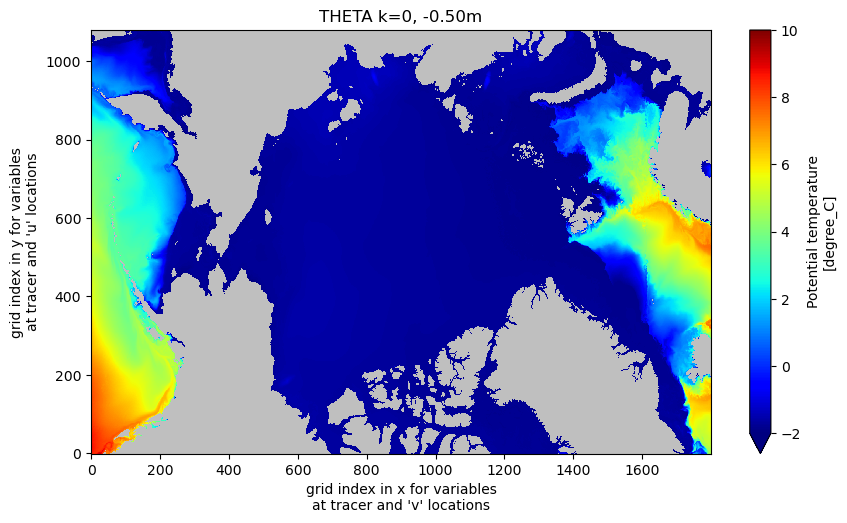

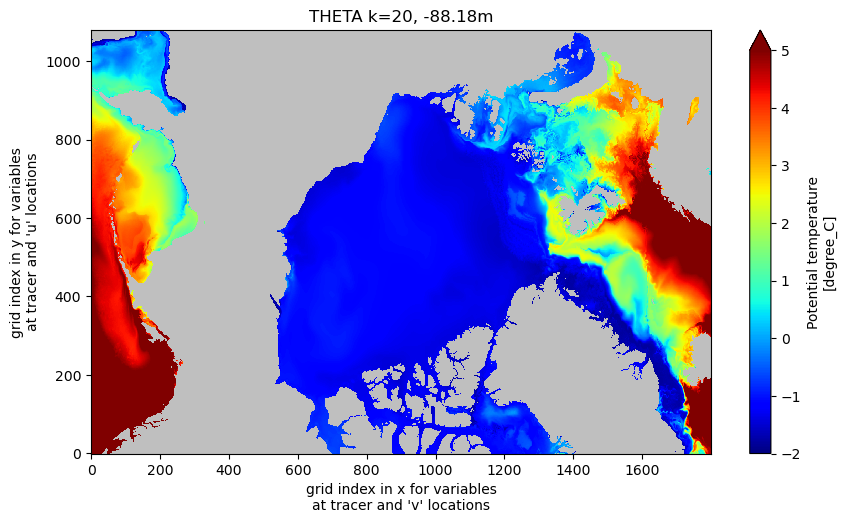

In [207]:
cmap = matplotlib.cm.jet
cmap.set_bad('gray',0.5)

plt.figure(figsize=[10,5.5]);
tmpsst = sst.where(grid.maskC.isel(k=0) == True)
tmpsst.plot(cmap=cmap, vmin=-2,vmax=10)
plt.title(f'THETA k=0, {grid.Z.values[0]:.2f}m')

plt.figure(figsize=[10,5.5]);
tmpt20 = t20.where(grid.maskC.isel(k=20) == True)
tmpt20.plot(cmap=cmap, vmin=-2,vmax=5)
plt.title(f'THETA k=20, {grid.Z.values[20]:.2f}m')

## Salinity

Text(0.5, 1.0, 'SALINITY k=20, -88.18m')

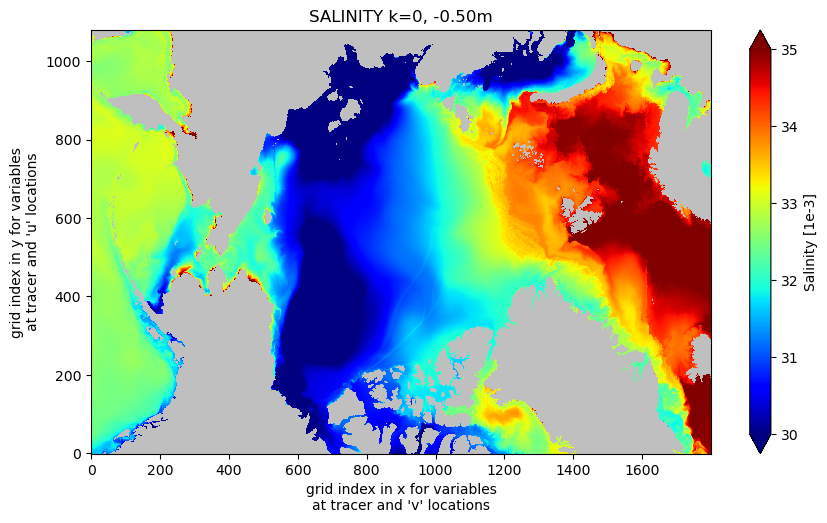

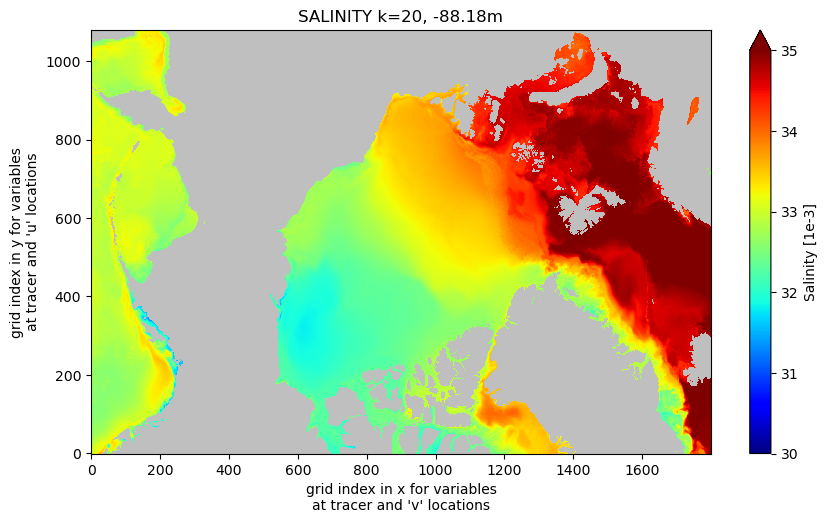

In [208]:
cmap = matplotlib.cm.jet
cmap.set_bad('gray',0.5)

plt.figure(figsize=[10,5.5]);
tmpsss = sss.where(grid.maskC.isel(k=0) == True)
tmpsss.plot(cmap=cmap, vmin=30,vmax=35)
plt.title(f'SALINITY k=0, {grid.Z.values[0]:.2f}m')

plt.figure(figsize=[10,5.5]);
tmps20 = s20.where(grid.maskC.isel(k=20) == True)
tmps20.plot(cmap=cmap, vmin=30,vmax=35)
plt.title(f'SALINITY k=20, {grid.Z.values[20]:.2f}m')

#### Polar stereographic projection

Another projection built into `plot_proj_to_latlon_grid` is polar stereographic.  The argument *lat_lim* determines the limit of this type of projection.  If *lat_lim* is postive, the projection is centered around the north pole and vice versa.

##### Northern Hemisphere

<Figure size 1080x540 with 0 Axes>

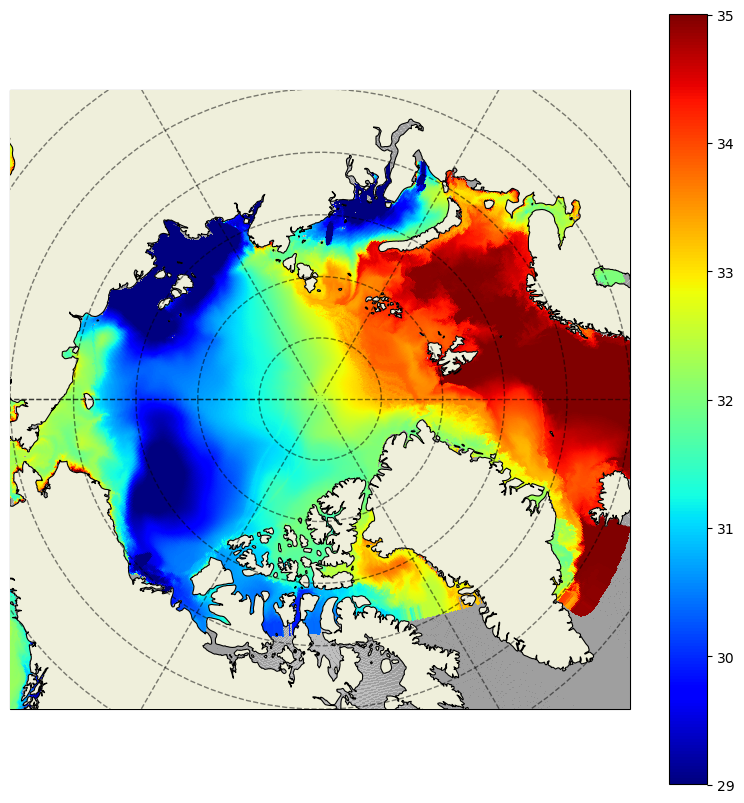

In [209]:
plt.figure(figsize=(12,6), dpi= 90)

plt.figure(figsize=[10,10]);
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, \
                              tmpsss, \
                              projection_type='stereo',\
                              show_colorbar=True,
                              dx=.1, dy=.1, cmin=29,cmax=35,\
                              lat_lim=65, user_lon_0=-90,cmap=cmap);
                            

## UVEL

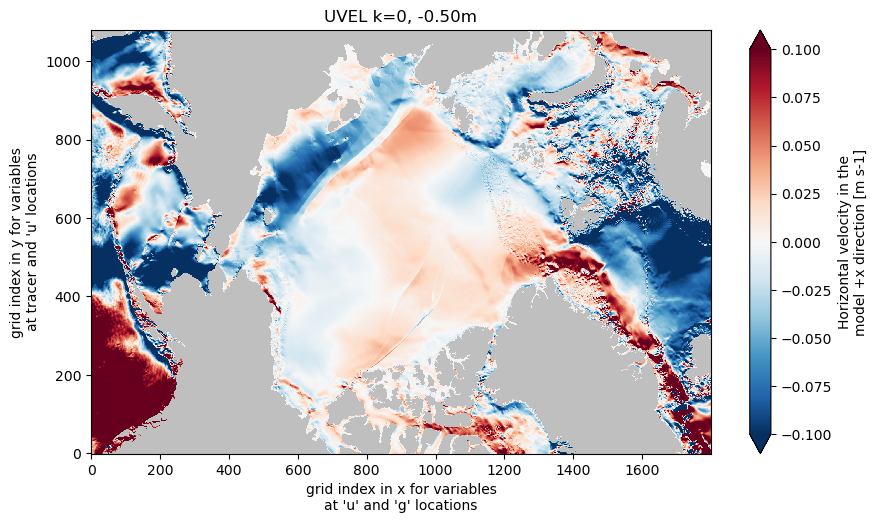

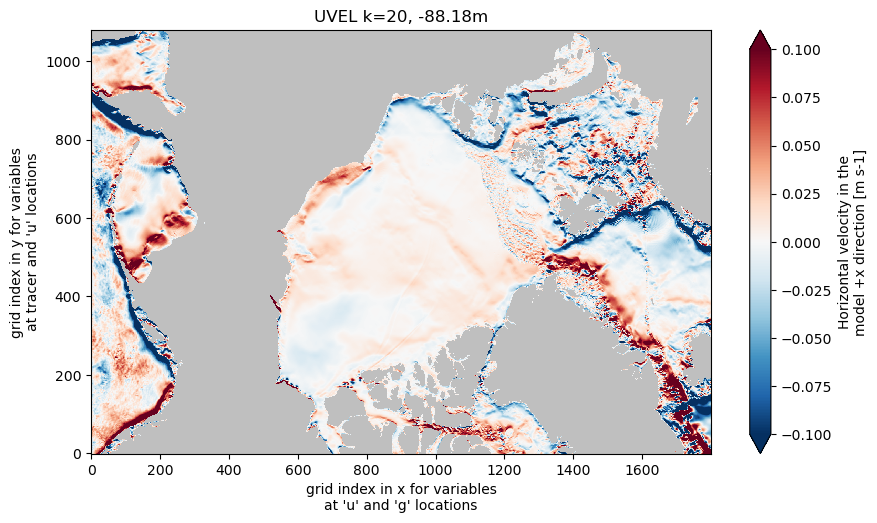

In [44]:
cmap = matplotlib.cm.RdBu_r
cmap.set_bad('gray',0.5)

plt.figure(figsize=[10,5.5]);
tmp = u0.where(grid.maskW.isel(k=0) == True)
tmp.plot(cmap=cmap, vmin=-.1,vmax=.1)
plt.title(f'UVEL k=0, {grid.Z.values[0]:.2f}m');

plt.figure(figsize=[10,5.5]);
tmp = u20.where(grid.maskW.isel(k=20) == True)
tmp.plot(cmap=cmap, vmin=-.1,vmax=.1)
plt.title(f'UVEL k=20, {grid.Z.values[20]:.2f}m');

# Sanity checking UVEL and masks

In [52]:
data['UVEL'].load();

In [172]:
zz = grid.XC.values*0

for k in range(20,22):
    tmp = np.squeeze(data['UVEL']['UVEL'].isel(k=k).values)
    tmp2 = np.squeeze(grid.maskW.isel(k=k).values)
    tmp3 = np.squeeze(grid.maskS.isel(k=k).values)

    # some velocity == 1
    tmpa = np.where(tmp == 0, 0, 1)
    # some mask == 1
    tmp2a = np.where(tmp2 == True, 1, 0)
    tmp2b = np.where(tmp3 == True, 1, 0)
    
    tmp2c = tmpa + tmp2a
    tmp2d = tmpa + tmp2b    
    print(k, np.sum(tmp2c==1))
    print(k, np.sum(tmp2d==1))

20 1425
20 11603
21 1422
21 12000


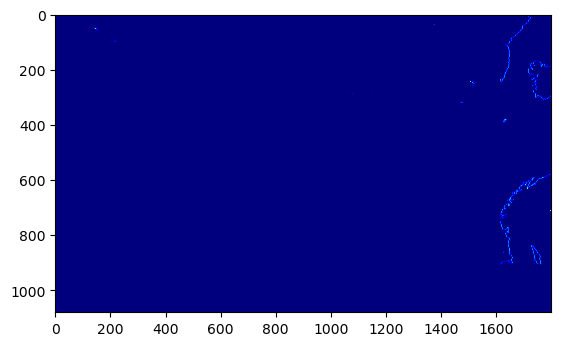

In [173]:
tmp2e = np.where(tmp2c==1,1,0);
plt.imshow(tmp2e, interpolation=None, vmin=0, vmax=1, cmap='jet')

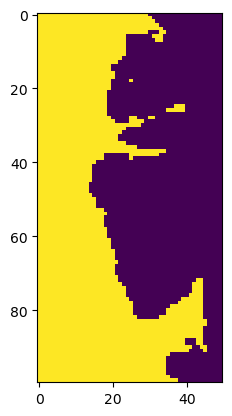

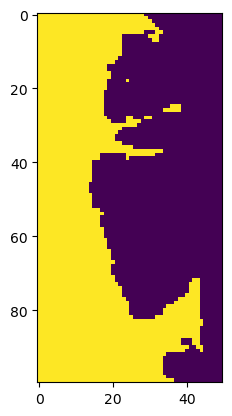

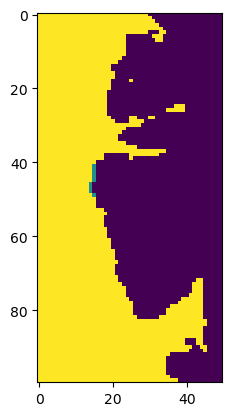

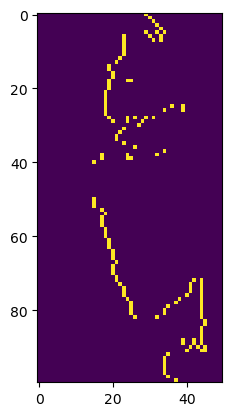

In [175]:
r1=700;r2=800
c1=1600;c2=1650;
plt.imshow(tmpa[r1:r2,c1:c2])
plt.figure()
plt.imshow(tmp2a[r1:r2,c1:c2])
plt.figure()
plt.imshow((tmpa[r1:r2,c1:c2]+tmp2a[r1:r2,c1-1:c2-1]))
plt.figure()
plt.imshow(tmp2e[r1:r2,c1:c2])

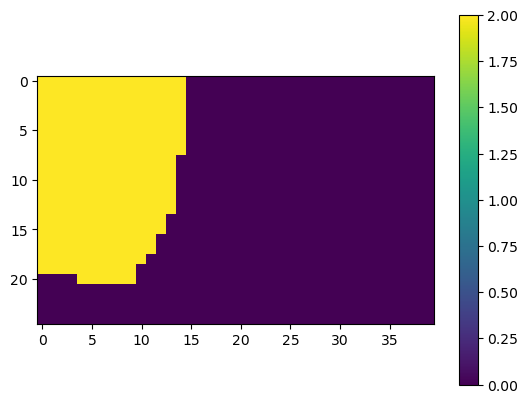

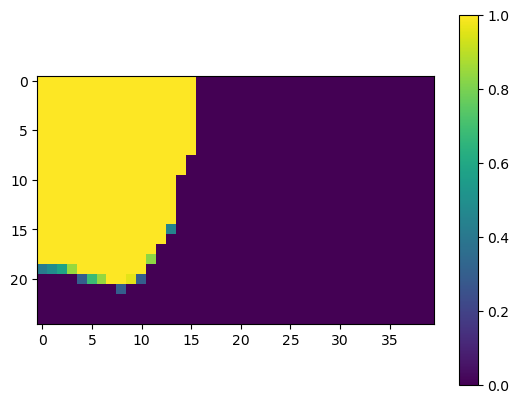

In [195]:
r=742;
r=742;
tmp_U = np.where(data['UVEL'].UVEL[0,15:40,r,1600:1640]==0,0,1);
tmp_hw = np.where(grid.hFacW[15:40,r,1600:1640]==False,0,1);
plt.imshow(tmp_U+tmp_hw);plt.colorbar()
plt.figure();
plt.imshow(grid.hFacS[15:40,r,1600:1640]);plt.colorbar()

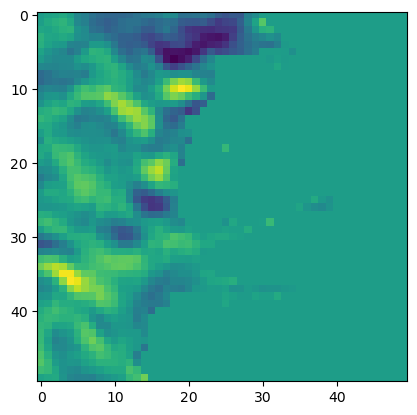

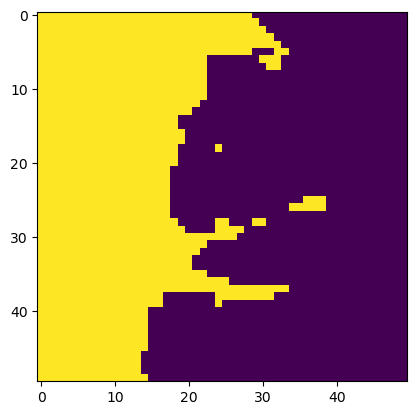

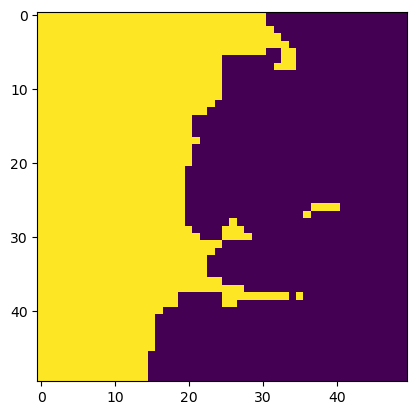

In [191]:
plt.imshow(tmp[700:750,1600:1650])
plt.figure()
plt.imshow(tmp2[700:750,1600:1650])
plt.figure()
plt.imshow(tmp3[700:750,1600:1650])


In [77]:
zz = grid.XC.values*0

for k in range(len(grid.Z)):
    tmp = data['UVEL']['UVEL'].isel(k=k).where(grid.maskW.isel(k=k) == True)
    tmp2 = np.where(tmp.values == 0,1,0)
    zz = zz+ tmp2
    print(k, np.sum(tmp2))

0 1655
1 1655
2 1655
3 1655
4 1649
5 1579
6 1513
7 1458
8 1367
9 1287
10 1215
11 1111
12 1073
13 1014
14 979
15 970
16 958
17 867
18 780
19 704
20 613
21 591
22 602
23 617
24 654
25 698
26 732
27 755
28 763
29 738
30 763
31 751
32 794
33 752
34 681
35 637
36 565
37 514
38 480
39 467
40 440
41 436
42 422
43 408
44 415
45 417
46 428
47 453
48 464
49 484
50 506
51 544
52 578
53 613
54 635
55 649
56 680
57 680
58 687
59 675
60 653
61 611
62 601
63 519
64 547
65 559
66 532
67 490
68 483
69 443
70 424
71 423
72 420
73 430
74 461
75 471
76 477
77 469
78 330
79 278
80 93
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0


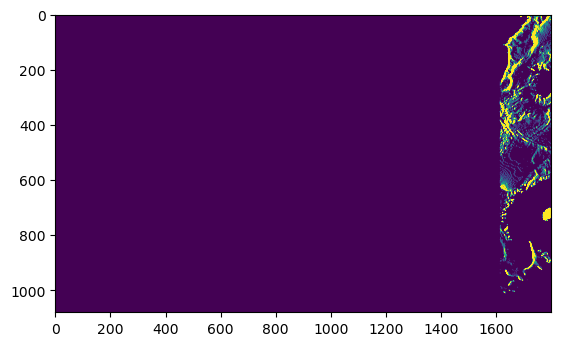

In [75]:
plt.imshow(zz[0],vmin=0,vmax=1)

##### Southern Hemisphere

The final example is a south-pole centered plot.  Note that *lat_lim* is now negative.

-179.5 179.5
-180.0 180.0
-89.5 89.5
-90.0 90.0


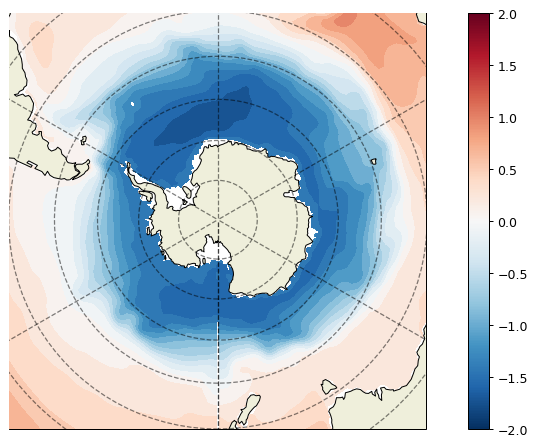

In [27]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              tmp_plt, \
                              projection_type='stereo',\
                              plot_type = 'contourf', \
                              show_colorbar=True,
                              dx=1, dy=1,\
                              lat_lim=-40,cmin=-2,cmax=2);
                             